<a href="https://colab.research.google.com/github/rakshaa2000/tidy-hacks/blob/main/Clean_Vs_Messy_Room_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Clean Room Vs Messy Room Classifier </h1></center>

In [ ]:
!pip install anvil-uplink

In [ ]:
!pip install -Uqq fastbook
import fastbook

In [ ]:
!pip install streamlit
!pip install pyngrok

In [ ]:
from fastbook import *

In [ ]:
import os
from zipfile import ZipFile

In [ ]:
from google.colab import files
files.upload()

Saving clean_vs_messy_room_dataset.zip to clean_vs_messy_room_dataset (1).zip


KeyboardInterrupt: ignored

In [ ]:
zip = ZipFile('clean_vs_messy_room_dataset.zip')
zip.extractall()
zip.close()

In [ ]:
dataset_path = os.path.join('dataset/')

In [ ]:
data_path = dataset_path + 'clean_and_messy_images/'

no_images_dataset = len(os.listdir(data_path))
no_val_images_dataset = int((15 * no_images_dataset) / 100)
no_train_images_dataset = no_images_dataset - no_val_images_dataset

print("No. of images in dataset: ", no_images_dataset)
print("No. of images to train the model: ", no_train_images_dataset)
print("No. of images in validation set will be : ", no_val_images_dataset)

No. of images in dataset:  213
No. of images to train the model:  182
No. of images in validation set will be :  31


In [ ]:
from fastai.vision.all import *
path = os.path.join(dataset_path, 'clean_and_messy_images')


def is_clean(x): 
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_clean, item_tfms=Resize(224))


In [ ]:
doc(ImageDataLoaders.from_name_func)

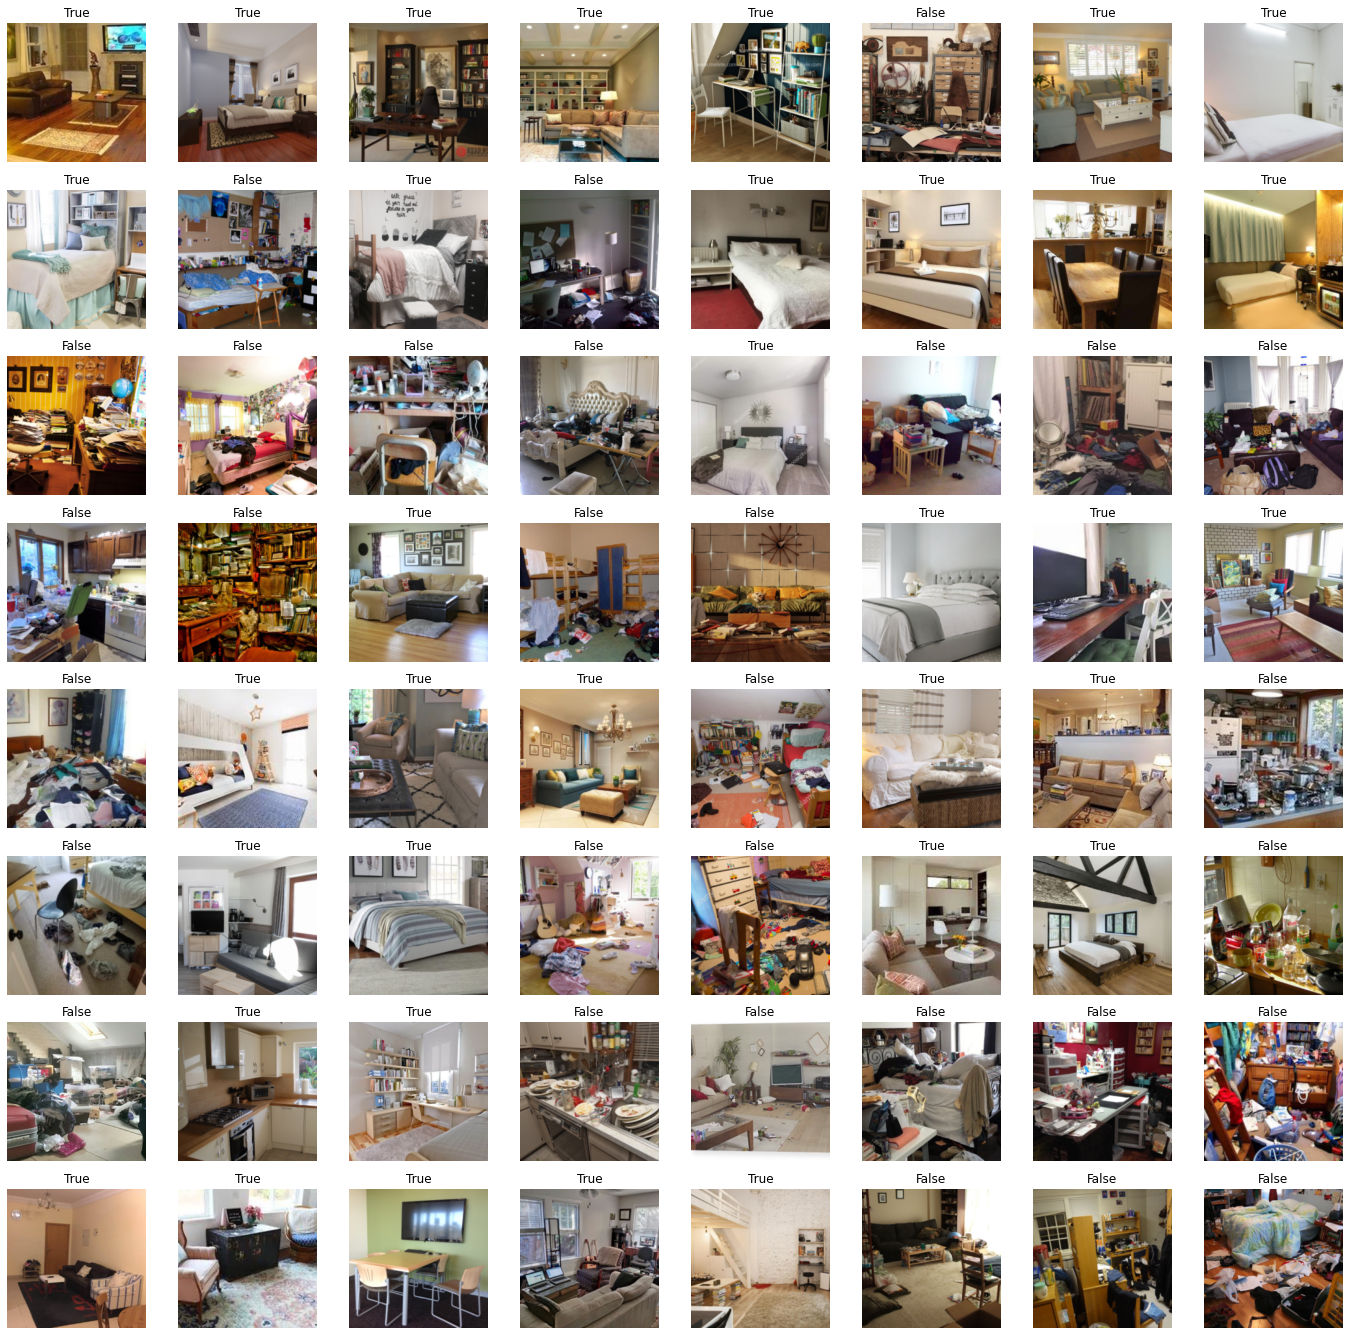

In [ ]:
dls.show_batch(max_n=100)

In [ ]:
model = cnn_learner(dls, resnet50, metrics=error_rate)
model.fine_tune(50)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

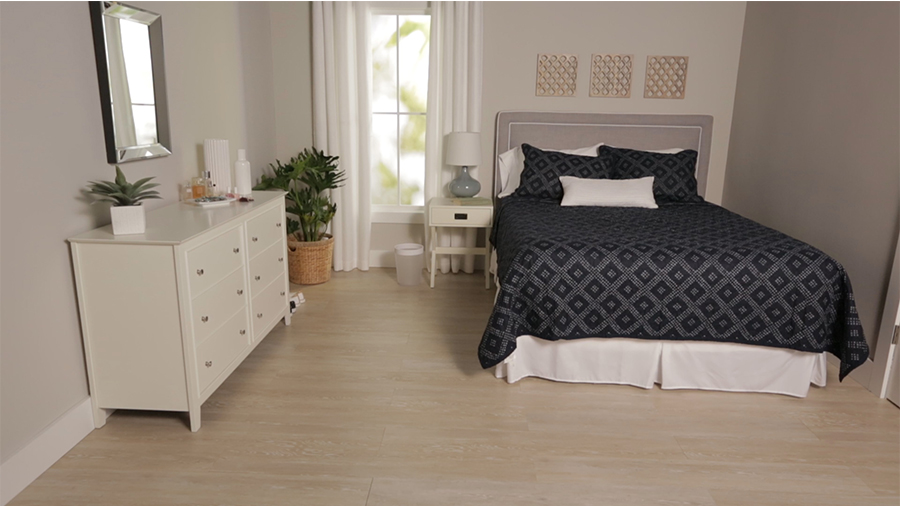

In [ ]:
img = PILImage.create(uploader.data[0])
img

In [ ]:
is_clean,_,probs = model.predict(img)
print(f"Is this clean?: {is_clean}.")
print(f"It's Clean: {probs[1] * 100}%  Not Clean: {probs[0] * 100}%")

Is this clean?: True.
It's Clean: 100.0%  Not Clean: 8.200520937862166e-07%


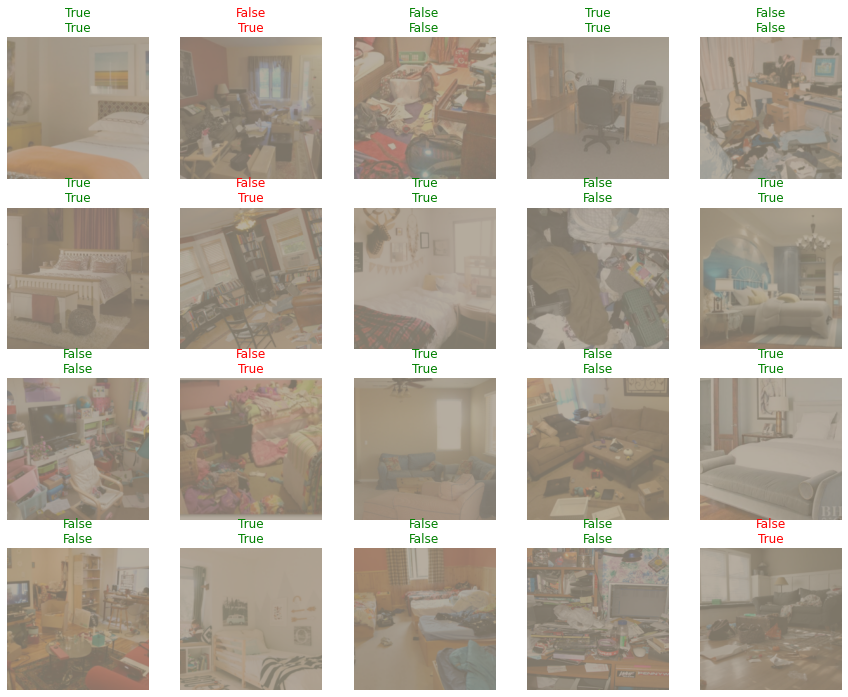

In [ ]:
model.show_results(max_n=20)

In [ ]:
test_dir = dataset_path + 'test/'

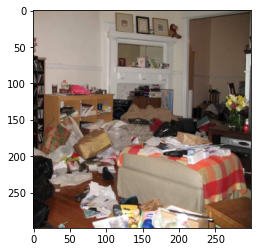

Is this clean?: True.
It's Clean: 99.69756317138672%  Not Clean: 0.30243998765945435%


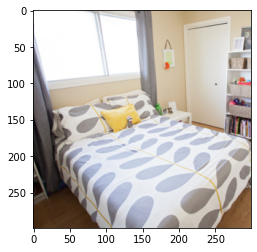

Is this clean?: True.
It's Clean: 100.0%  Not Clean: 1.4970199799790862e-06%


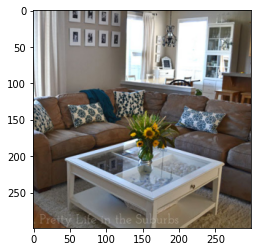

Is this clean?: True.
It's Clean: 100.0%  Not Clean: 6.961815870454302e-07%


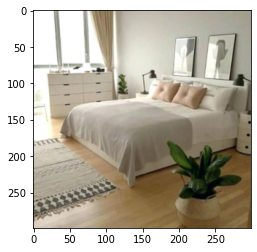

Is this clean?: True.
It's Clean: 100.0%  Not Clean: 1.6059209428931354e-06%


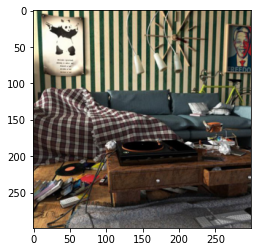

Is this clean?: True.
It's Clean: 82.29426574707031%  Not Clean: 17.705730438232422%


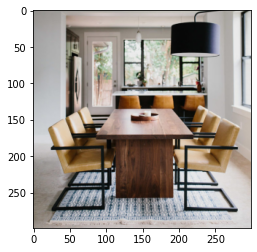

Is this clean?: True.
It's Clean: 99.99991607666016%  Not Clean: 8.595926192356274e-05%


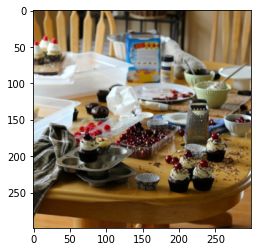

Is this clean?: False.
It's Clean: 0.051959726959466934%  Not Clean: 99.94804382324219%


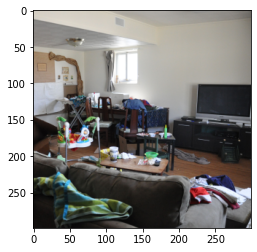

Is this clean?: False.
It's Clean: 1.711671233177185%  Not Clean: 98.288330078125%


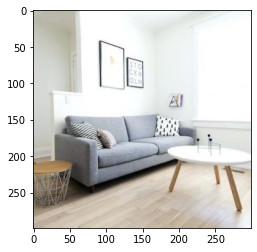

Is this clean?: True.
It's Clean: 99.99998474121094%  Not Clean: 6.220355317054782e-06%


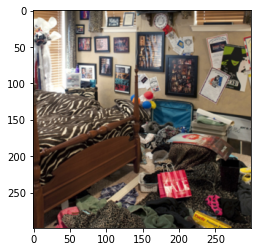

Is this clean?: False.
It's Clean: 5.958683490753174%  Not Clean: 94.04132080078125%


In [ ]:
%matplotlib inline

test_images_list = os.listdir(test_dir)

for img in test_images_list:
  sn = SimpleNamespace(data = [test_dir + img])
  img = PILImage.create(sn.data[0])
  plt.figure()
  plt.imshow(img)
  plt.show()
  is_clean,_,probs = model.predict(img)
  print(f"Is this clean?: {is_clean}.")
  print(f"It's Clean: {probs[1] * 100}%  Not Clean: {probs[0] * 100}%")

In [ ]:
model.save('model_v0')

Path('dataset/clean_and_messy_images/models/model_v0.pth')

In [ ]:
interp = Interpretation.from_learner(model)
interp.plot_top_losses(6, figsize=(15,10))